In [1]:
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14

In [3]:
file_path = r"D:\PROG\docu3C\BollyAI_2_0\Data\trailer-data\complete-data.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    print("⚠️ UTF-8 failed, trying 'ISO-8859-1'")
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(f"\n Rows loaded: {len(df)}")
print(f" Columns detected: {df.columns.tolist()}")
print(f"\n Sample rows:\n{df.sample(3)}")

print("\n Null or blank counts per column:")
print(df.isnull().sum())
print(df.eq("").sum())



 Rows loaded: 32197
 Columns detected: ['frame_number', 'gender', 'emotion', 'year', 'movie_name']

 Sample rows:
       frame_number gender emotion  year              movie_name
29092            82    man     sad  2016  hai_apna_dil_toh_awara
19250            90    man     sad  2017                  kaabil
27555            73  woman    fear  2016          days_of_tafree

 Null or blank counts per column:
frame_number    0
gender          0
emotion         0
year            0
movie_name      0
dtype: int64
frame_number    0
gender          0
emotion         0
year            0
movie_name      0
dtype: int64


<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Aldrin Joan\AppData\Local\Temp\ipykernel_8244\534024623.py:9: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot1_emotion_count_by_gender.png")


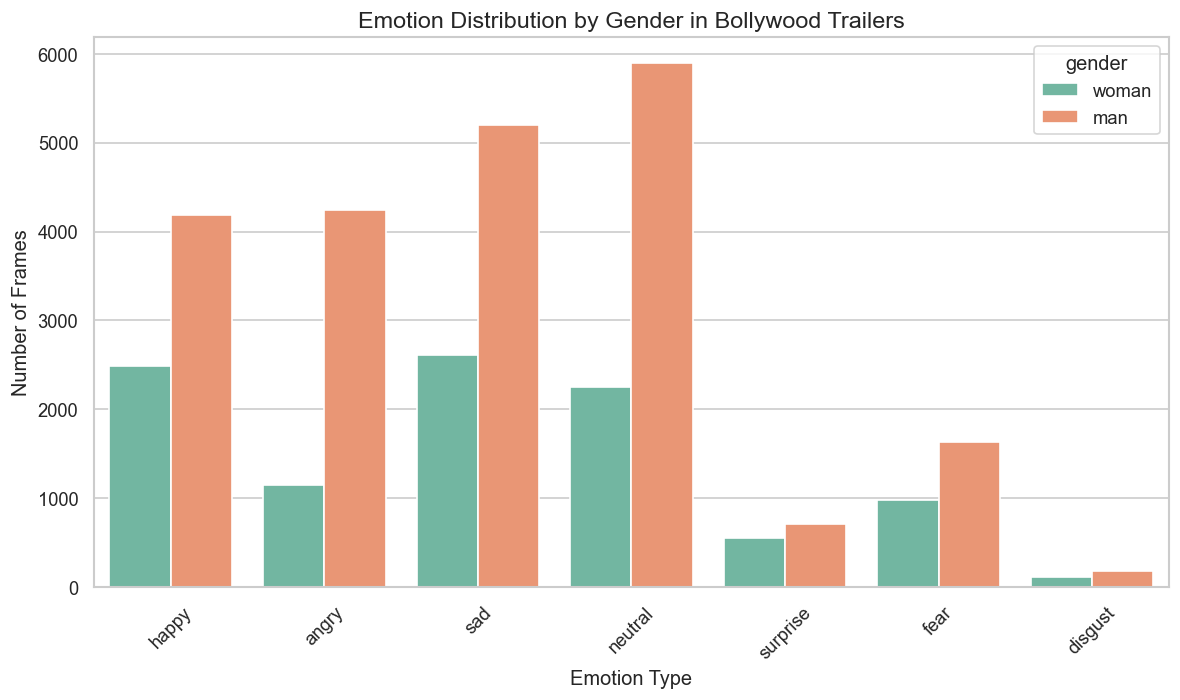

In [4]:
# 📊 Plot 1: Emotion count distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion', hue='gender', palette='Set2')
plt.title("Emotion Distribution by Gender in Bollywood Trailers")
plt.xlabel("Emotion Type")
plt.ylabel("Number of Frames")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot1_emotion_count_by_gender.png")
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Aldrin Joan\AppData\Local\Temp\ipykernel_8244\1623973128.py:12: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot2_emotion_percentage_by_gender.png")


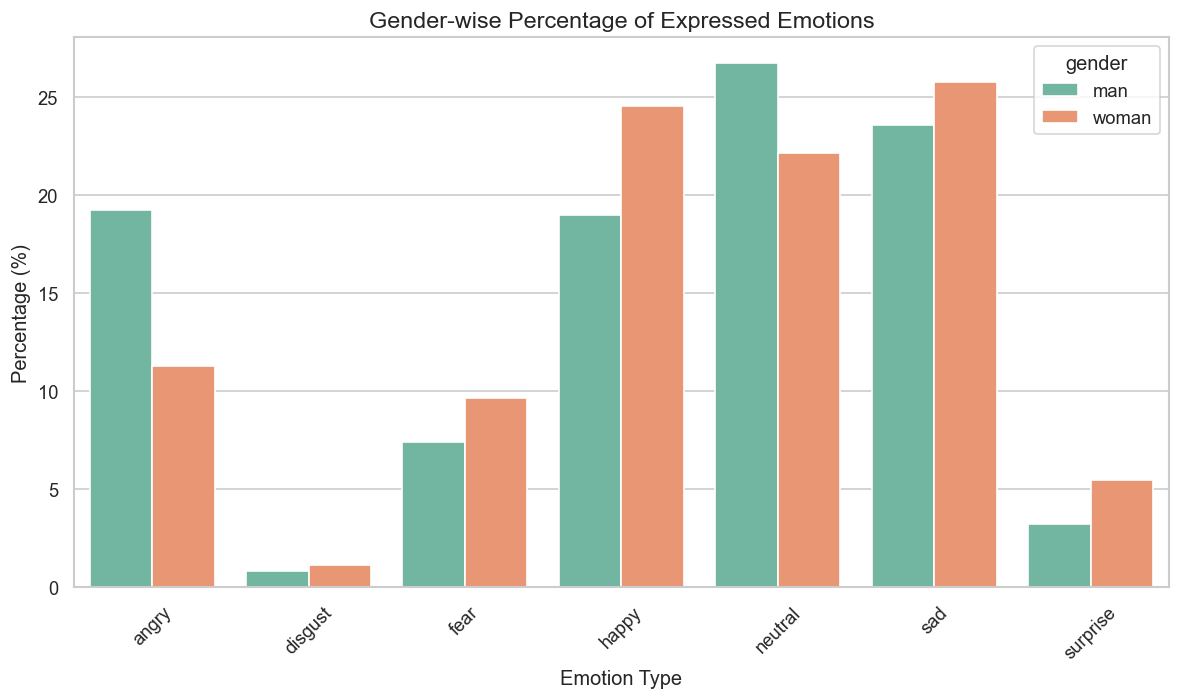

In [5]:
# 📊 Plot 2: Emotion percentage breakdown by gender
emotion_counts = df.groupby(['gender', 'emotion']).size().reset_index(name='count')
emotion_counts['percentage'] = emotion_counts.groupby('gender')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10, 6))
sns.barplot(data=emotion_counts, x='emotion', y='percentage', hue='gender', palette='Set2')
plt.title("Gender-wise Percentage of Expressed Emotions")
plt.ylabel("Percentage (%)")
plt.xlabel("Emotion Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot2_emotion_percentage_by_gender.png")
plt.show()


<>:17: SyntaxWarning: invalid escape sequence '\P'
<>:17: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Aldrin Joan\AppData\Local\Temp\ipykernel_8244\4196064633.py:17: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot3_emotion_trends_over_time.png")


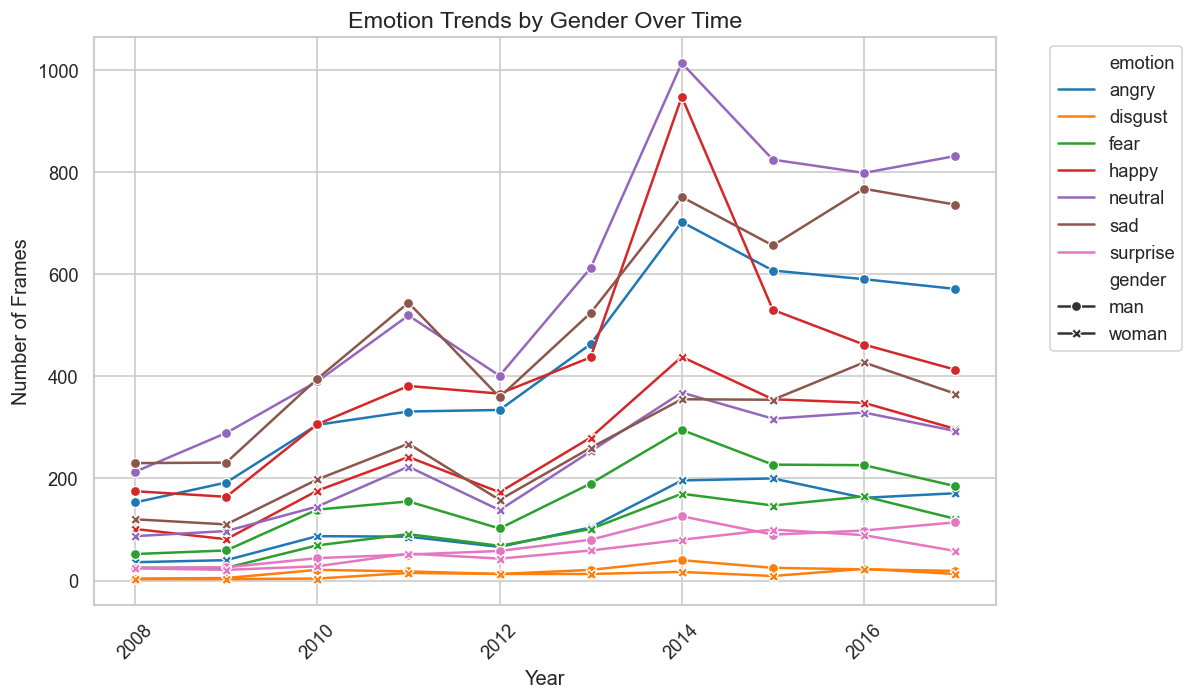

In [6]:
# 📈 Plot 3: Emotion frequency trends over time by gender
emotion_over_time = df.groupby(['year', 'gender', 'emotion']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=emotion_over_time,
    x='year', y='count',
    hue='emotion', style='gender',
    markers=True, dashes=False, palette='tab10'
)
plt.title("Emotion Trends by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Frames")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("D:\PROG\docu3C\BollyAI_2_0\output\plot3_emotion_trends_over_time.png")
plt.show()
